# 显示系统中的所有中文字体

1. 利用os模块中的stat()获取字体文件的大小，并保留字体索引列表中所有大于1M字节的字体文件。由于中文字体文件通常都很大，因此使用这种方法可以粗略地找出所有的中文字体文件。

1. 调用子图对象的text()在其中添加文字，注意文字必须是Unicode字符串。通过一个描述字体的字典指定文字的字体：’fontname’键所对应的值就是字体名。

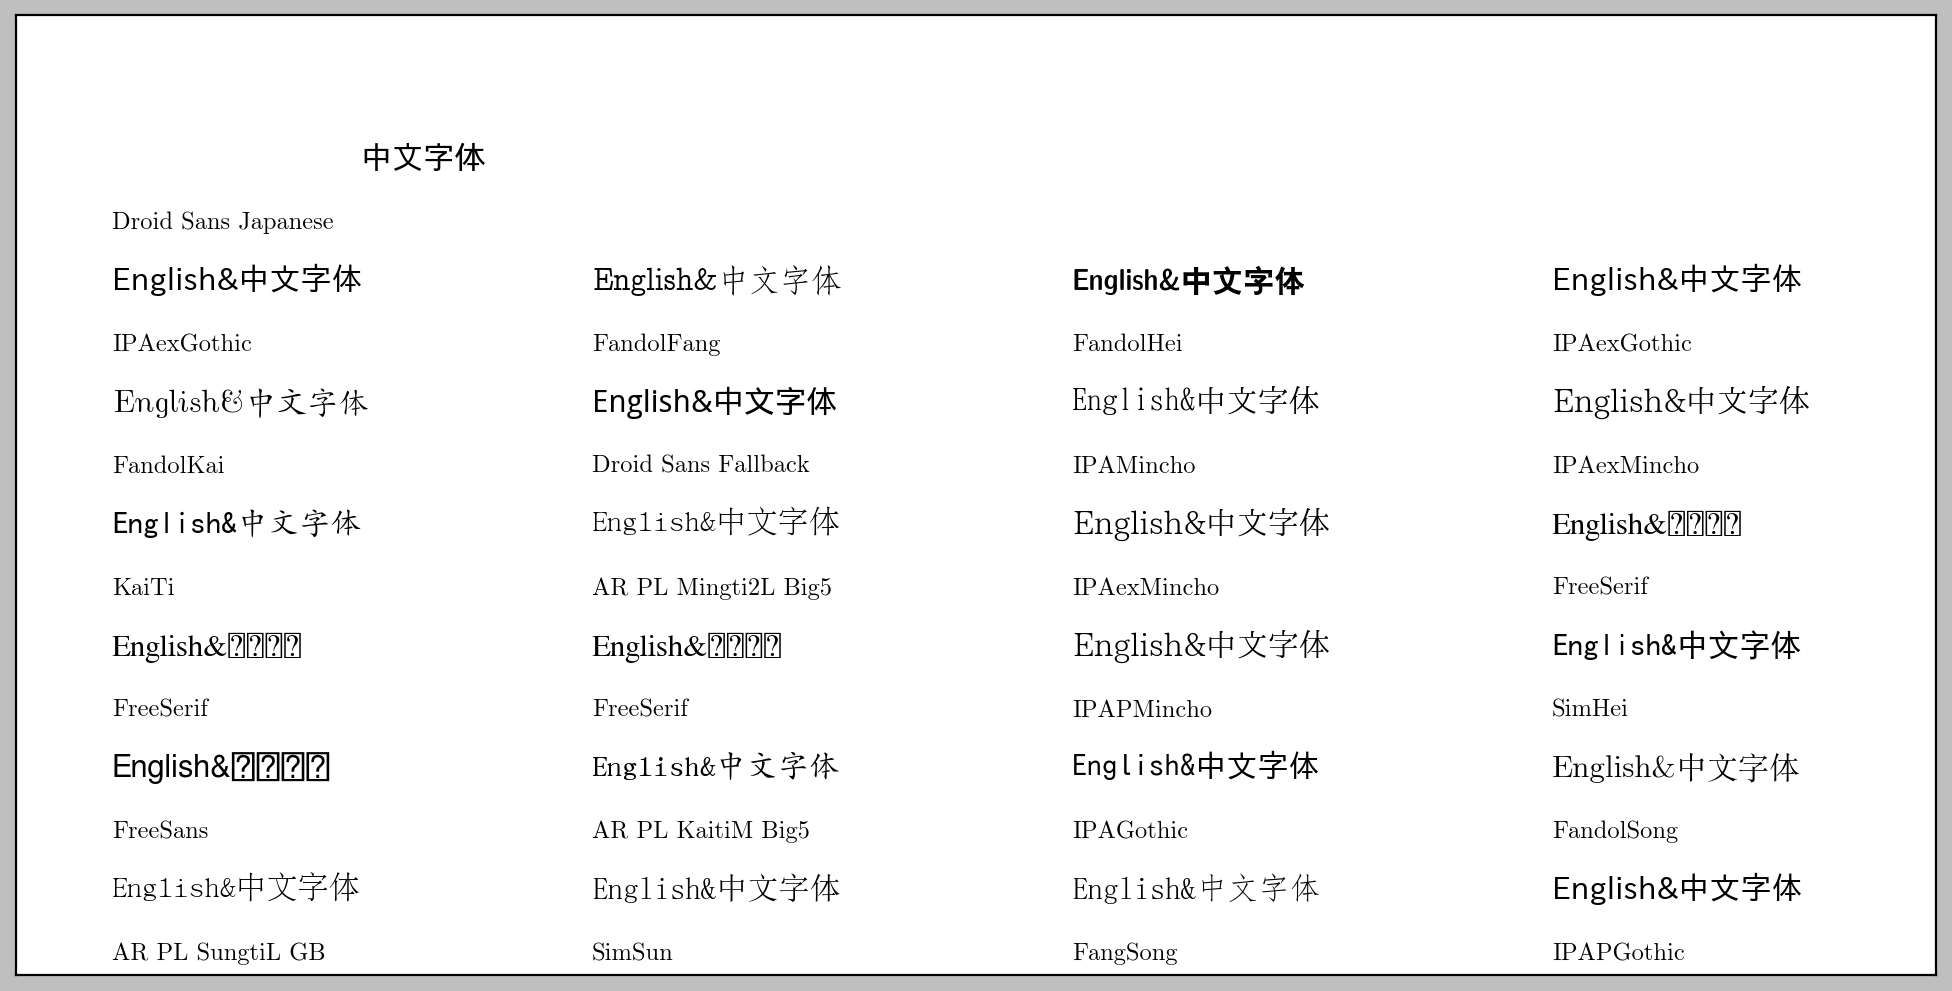

In [1]:
from matplotlib.font_manager import fontManager
import matplotlib.pyplot as plt
import os
import os.path

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
plt.subplots_adjust(0, 0, 1, 1, 0, 0)
plt.xticks([])
plt.yticks([])
x, y = 0.05, 0.08
fonts = [font.name for font in fontManager.ttflist if
    os.path.exists(font.fname) and os.stat(font.fname).st_size>1e6] 
font = set(fonts)
dy = (1.0-y)/(len(fonts)/4 + (len(fonts)%4!=0))
for font in fonts:
    t = ax.text(x, y, u"English&中文字体", {'fontname':font, 'fontsize':14}, transform=ax.transAxes) 
    ax.text(x, y-dy/2, font, transform=ax.transAxes)
    x += 0.25
    if x >= 1.0:
        y += dy
        x = 0.05
plt.show()

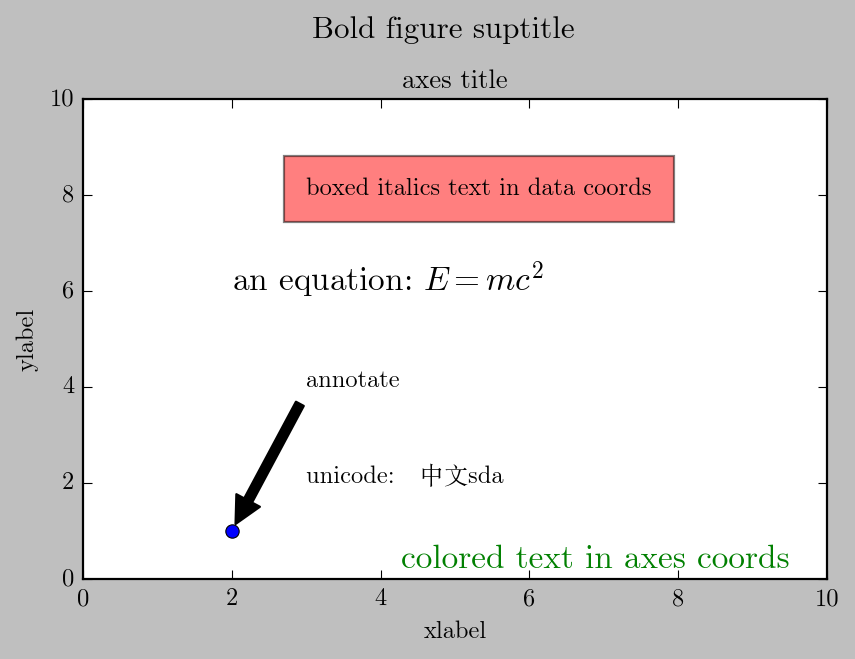

In [2]:

import matplotlib as mpl
import matplotlib.pyplot as plt

#myfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/wenquanyi/wqy-microhei/wqy-microhei.ttc')

fig = plt.figure()
fig.suptitle('Bold figure suptitle', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('axes title')
ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)

ax.text(3, 2, 'unicode:　中文sda')

ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)

ax.plot([2], [1], 'o')

ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
            arrowprops={'facecolor':'black', 'shrink':0.05})

ax.axis([0, 10, 0, 10])

plt.show()